# Exercice 1
## Programmation d’une méthode de discrimination : Kppv

In [2]:
import pandas as pd
import scipy.io as sp
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
def kppv(apprent, classe_origine, k, x):
    clas = []
    N1 = len(apprent[0])
    N2 = len(x[0])
     

    # parcourir les individus à classer
    for i in range (N2):
        # position de l'individu
        posIndividu = np.array(x[:,i])
        # tableau de distance entre l'individu et tous l'apprentissage
        dists_apprents = []
        # calculer la distance avec tous les individus de l'apprentissage
        for j in range (N1):
            # position du voisin j
            posAppr = np.array(apprent[:,j])
            # classe du voisin j
            classAppr = classe_origine[j]
            # distance entre l'individu le voisin j
            dist = np.linalg.norm(posIndividu - posAppr)
            obj = [dist, classAppr]
            # ajout de la distance et la classe au tableau
            dists_apprents.append(obj)
                    
        # tri du tableau des distance
        dists_apprents = sorted(dists_apprents, key=lambda o: o[0])
        #print(dists_apprents)

        # tableau des k plus proches voisins
        kNearest = [o[1] for o in dists_apprents[:k]]
        clas.append(max(kNearest, key = kNearest.count))
        
    return clas

In [4]:
def calcTauxErreur(x, y):
    return np.mean(x != y) * 100

def affiche_classe(x, y, clas, title = "Classification", labels = ["0", "1", "2"]):
    # afficher les résultats de la classification
    scatter = plt.scatter(x, y, c = clas)
    plt.title(title)
    plt.legend(
        handles=scatter.legend_elements()[0],
        labels=labels
        )
    plt.show()
    



def affiche_taux_erreur(k, tab1, tab2 = None, labels = ["KNN", "Bayes"], title = "Taux d'erreur"):
    # afficher le graph des résultats de la classification bayesienne et knn
    plt.plot(k, tab1, '-o')
    plt.title(title)
    plt.xlabel("k")
    plt.ylabel("Taux d'erreur %")
    
    if tab2 != None:
        plt.plot(k, tab2, '-o')
    plt.legend(labels)
    plt.show()
    

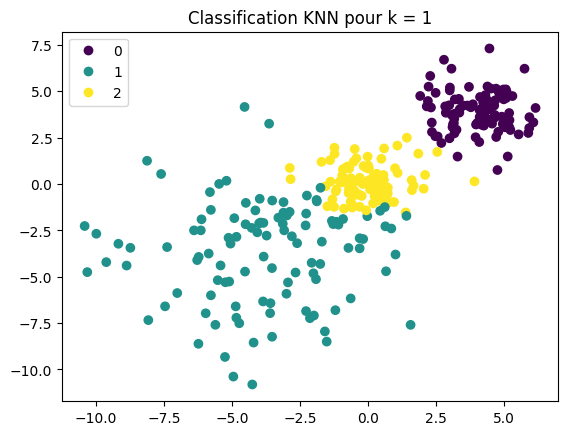

k =  1 taux d'erreur =  6.0 %


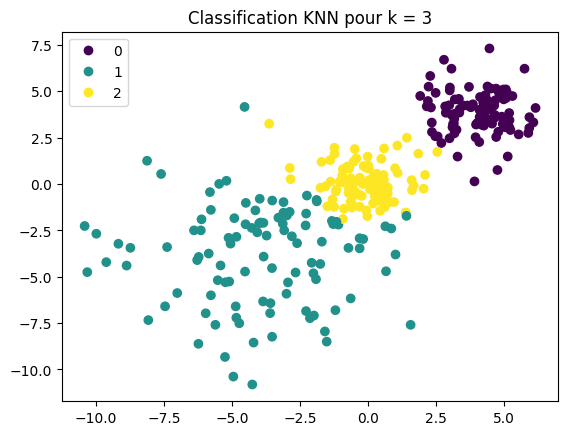

k =  3 taux d'erreur =  4.333333333333334 %


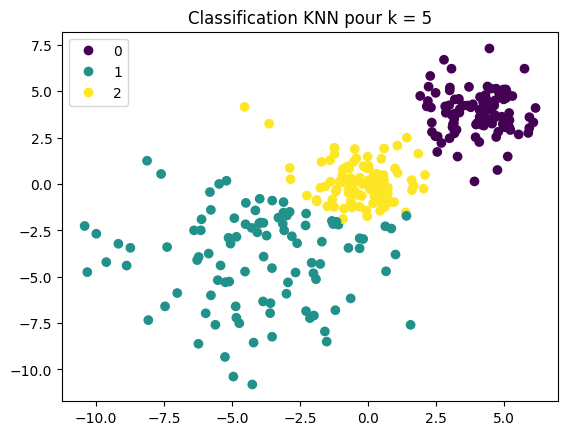

k =  5 taux d'erreur =  3.3333333333333335 %


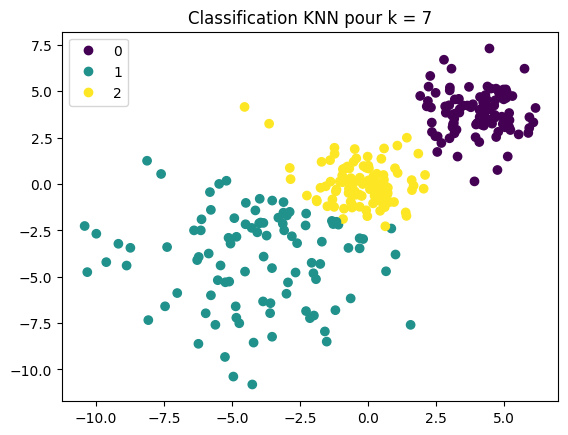

k =  7 taux d'erreur =  2.666666666666667 %


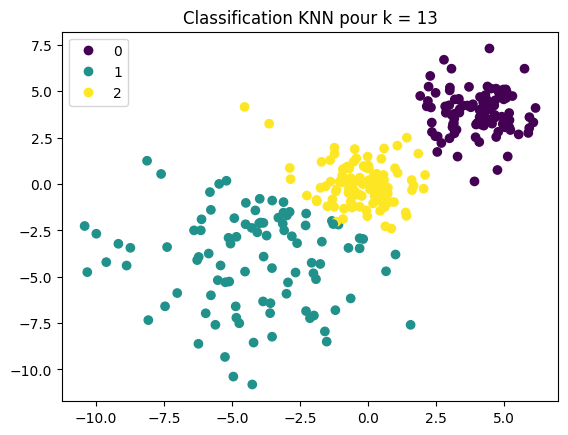

k =  13 taux d'erreur =  2.0 %


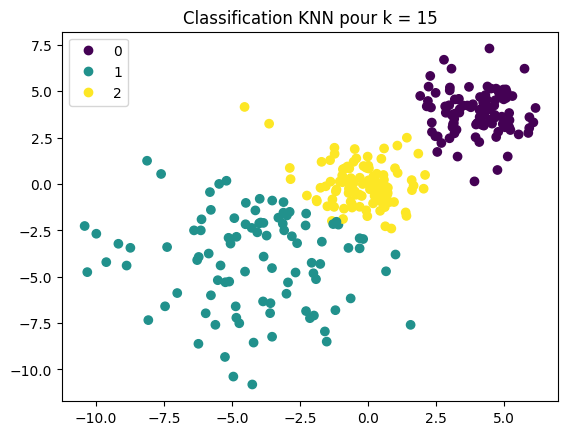

k =  15 taux d'erreur =  2.666666666666667 %


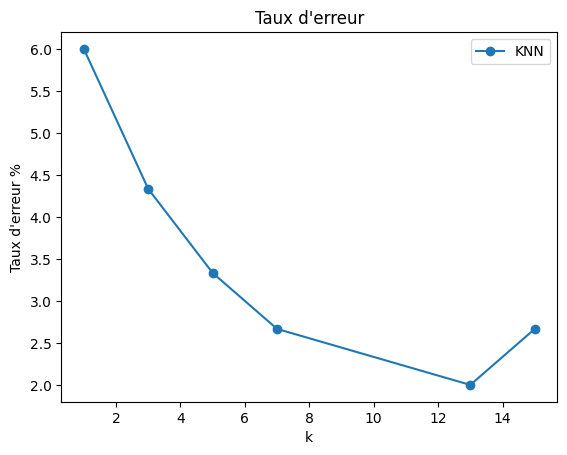

In [5]:
Data = sp.loadmat("../data/p1_test.mat")
classes = [1]*50 + [2]*50 + [3]*50
k = [1, 3, 5, 7, 13, 15]
tauxErreur = []

for i in k:
    clas = kppv(Data["test"], classes, i, Data["x"])
    affiche_classe(Data["x"][0], Data["x"][1], clas, "Classification KNN pour k = " + str(i))
    error = calcTauxErreur(clas, Data["clasapp"])
    print("k = ", i, "taux d'erreur = ", error , "%")
    tauxErreur.append(error)


affiche_taux_erreur(k, tauxErreur)


# Exercice 2
## Comparaison des deux méthodes (param ́etriques et non param ́etriques)

### 2.1 Influence de la taille de l’ensemble d’apprentissage : taille réduite

In [6]:
# UTIL
def readExcel(fileName):
    # load data
    apprent = pd.read_excel('../data/' + fileName + '.xlsx', sheet_name='Ensemble Apprentissage')
    x = pd.read_excel('../data/' + fileName + '.xlsx', sheet_name='Inconnu')

    # remove column 0
    apprent = apprent.drop(columns=['Unnamed: 0'])
    x = x.drop(columns=['Unnamed: 0'])

    # transpose
    apprent = apprent.T
    x = x.T

    # oracle
    oracle = x[2]

    # remove column 2 
    x = x.drop(columns=[2])

    return apprent, x, oracle

In [7]:
#Naive Bayes
def naive_bayes(apprent, classe_origine, x):
    # Create a Gaussian Classifier
    model = GaussianNB()
    # Train the model using the training sets
    model.fit(apprent, classe_origine)
    # Predict Output
    return model.predict(x)

# KNN
def knn(apprent, classe_origine, k, x):
    # Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the data
    knn.fit(apprent, classe_origine)
    # Predict Output
    return knn.predict(x)

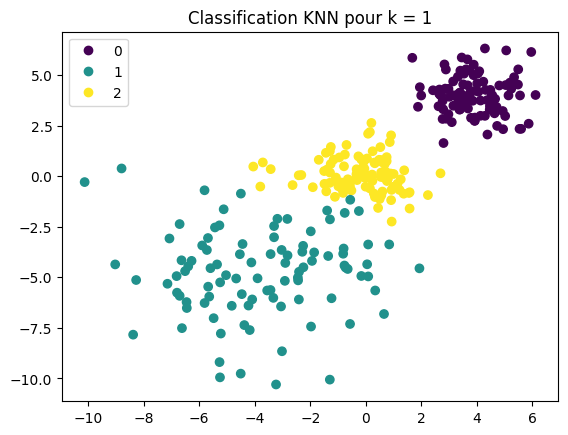

k =  1 taux d'erreur =  3.6666666666666665 %


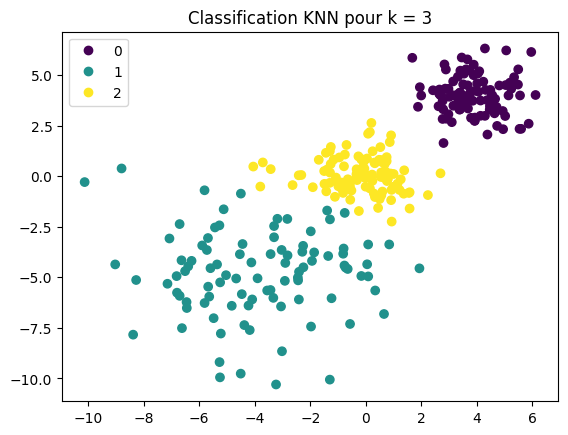

k =  3 taux d'erreur =  3.0 %


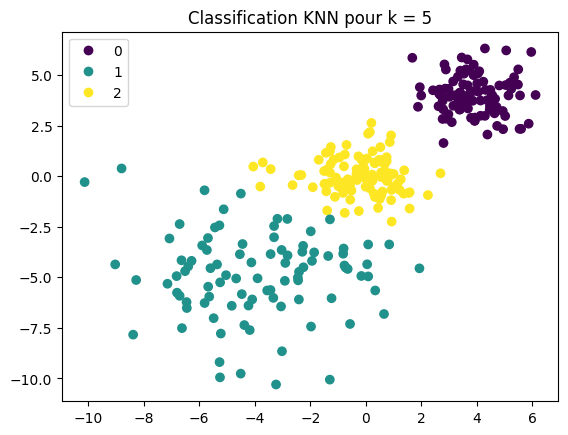

k =  5 taux d'erreur =  2.3333333333333335 %


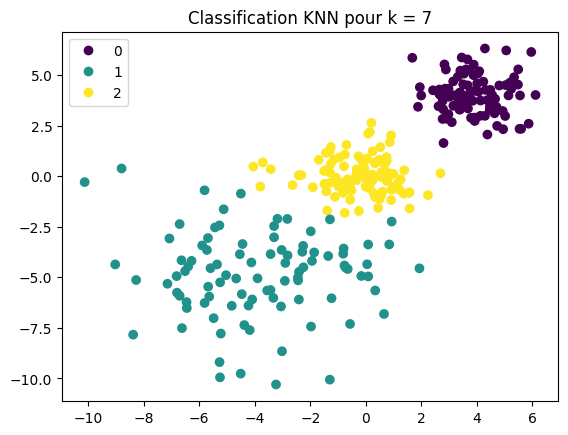

k =  7 taux d'erreur =  2.666666666666667 %


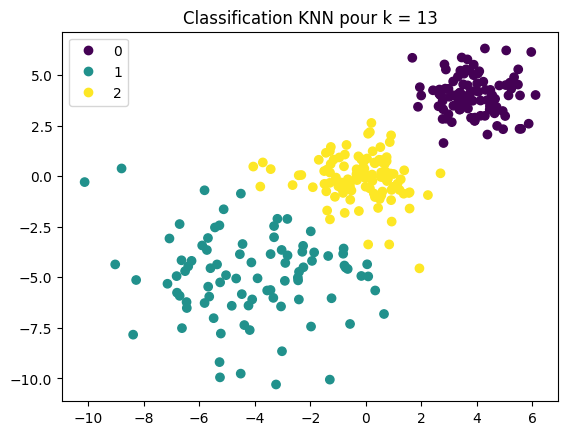

k =  13 taux d'erreur =  3.6666666666666665 %


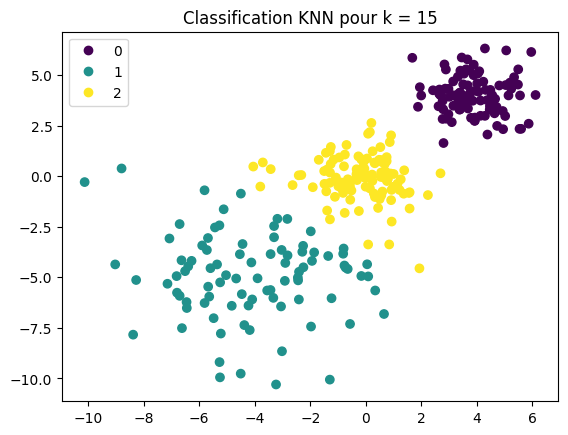

k =  15 taux d'erreur =  3.6666666666666665 %


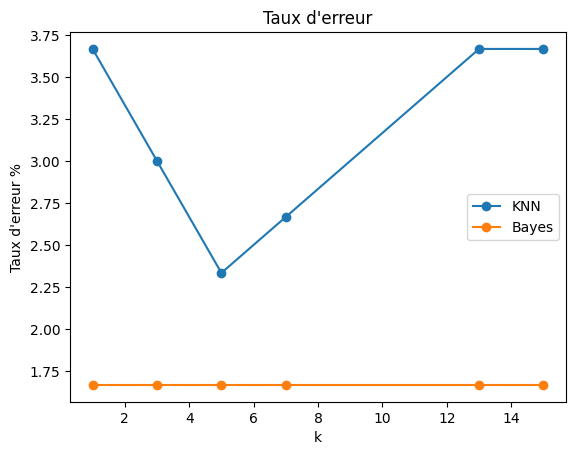

In [8]:
classes = [0]*20 + [1]*20 + [2]*20
k = [1, 3, 5, 7, 13, 15]
p1_petit_apprent, p1_petit_x, p1_petit_oracle = readExcel("p1_petit")

# for KNN
knnErrors = []
for i in k:
    res_knn = knn(p1_petit_apprent, classes, i, p1_petit_x)
    affiche_classe(p1_petit_x[0], p1_petit_x[1], res_knn, "Classification KNN pour k = " + str(i))
    error = calcTauxErreur(res_knn, p1_petit_oracle)
    print("k = ", i, "taux d'erreur = ", error , "%")
    knnErrors.append(error)

# for Bayes
res_bayes = naive_bayes(p1_petit_apprent, classes, p1_petit_x)
bayesErrors = [calcTauxErreur(res_bayes, p1_petit_oracle)]*len(k)

affiche_taux_erreur(k, knnErrors, bayesErrors)


### 2.2 Influence de la taille de l’ensemble d’apprentissage : taille importante

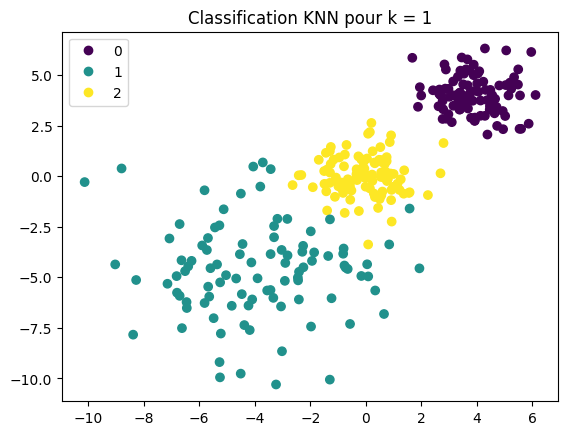

k =  1 taux d'erreur =  2.0 %


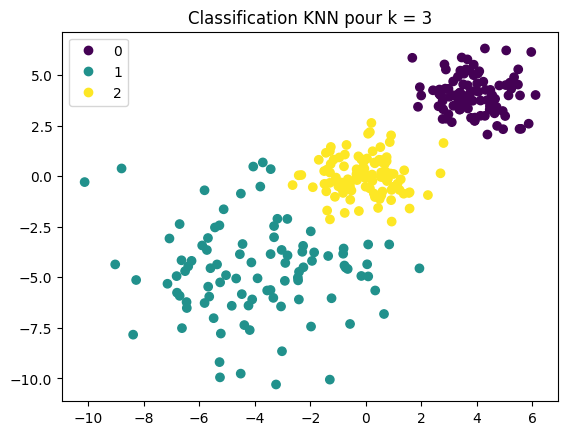

k =  3 taux d'erreur =  1.6666666666666667 %


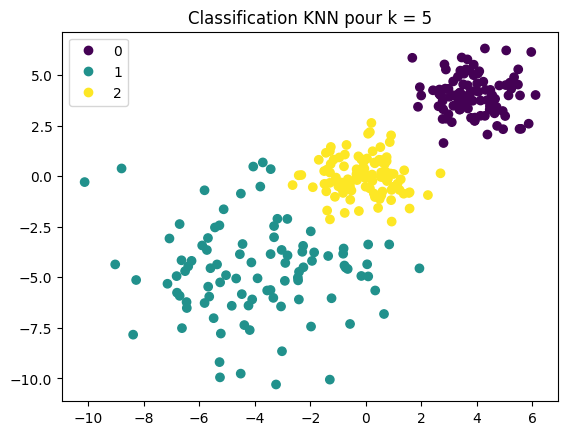

k =  5 taux d'erreur =  1.3333333333333335 %


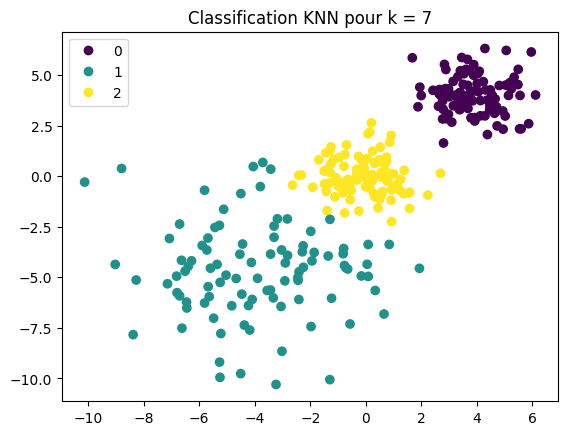

k =  7 taux d'erreur =  1.0 %


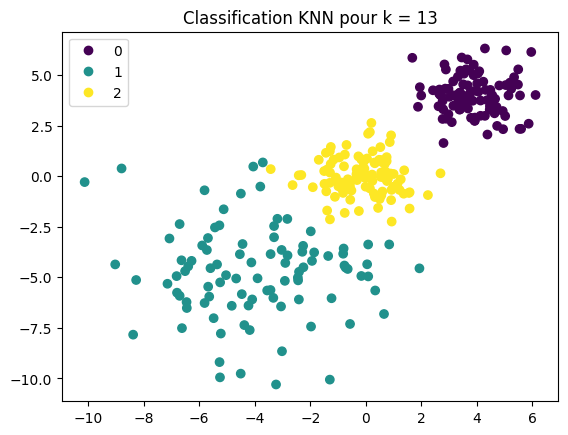

k =  13 taux d'erreur =  1.6666666666666667 %


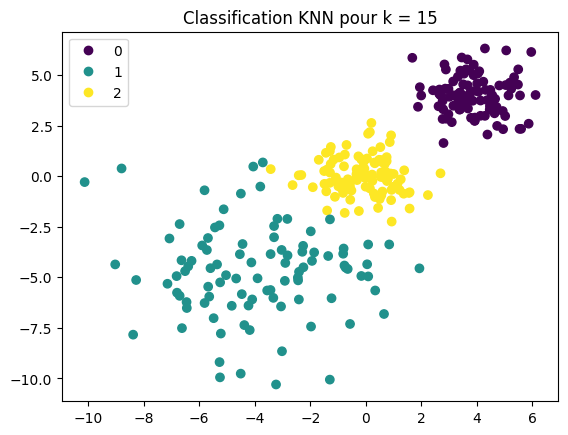

k =  15 taux d'erreur =  1.3333333333333335 %


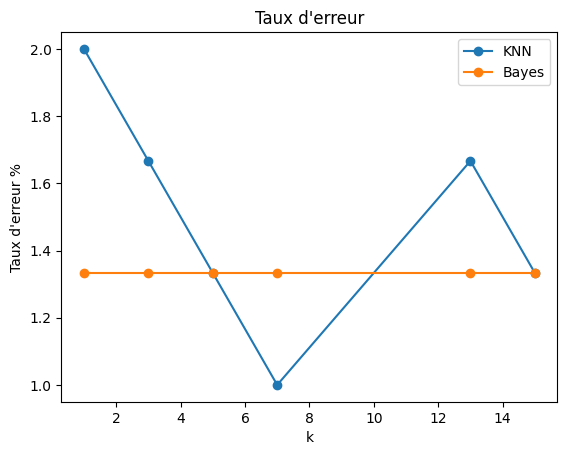

In [9]:
classes = [0]*150 + [1]*150 + [2]*150
k = [1, 3, 5, 7, 13, 15]

p1_grand_apprent, p1_grand_x, p1_grand_oracle = readExcel("p1_grand")

# for KNN
knnErrors = []
for i in k:
    res_knn = knn(p1_grand_apprent, classes, i, p1_grand_x)
    affiche_classe(p1_grand_x[0], p1_grand_x[1], res_knn, "Classification KNN pour k = " + str(i))
    error = calcTauxErreur(res_knn, p1_grand_oracle)
    print("k = ", i, "taux d'erreur = ", error , "%")
    knnErrors.append(error)

# for Bayes
res_bayes = naive_bayes(p1_grand_apprent, classes, p1_grand_x)
bayesErrors = [calcTauxErreur(res_bayes, p1_grand_oracle)]*len(k)

affiche_taux_erreur(k, knnErrors, bayesErrors)

### 2.3 Absence de professeur

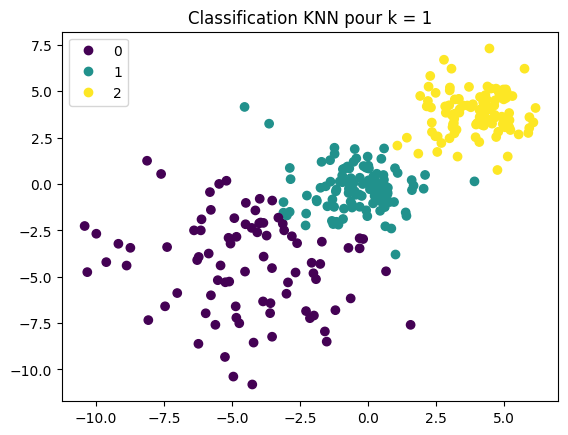

k =  1 taux d'erreur =  6.666666666666667 %


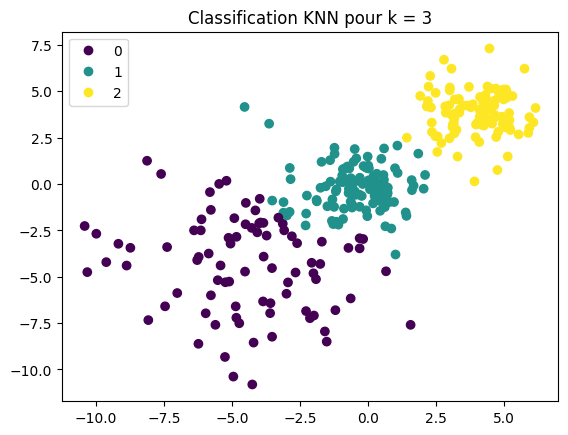

k =  3 taux d'erreur =  6.0 %


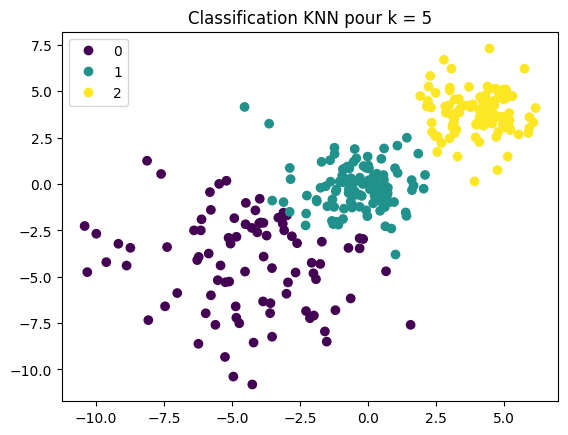

k =  5 taux d'erreur =  5.0 %


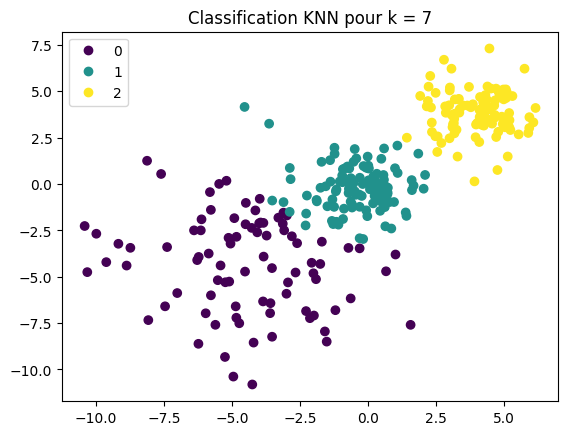

k =  7 taux d'erreur =  5.0 %


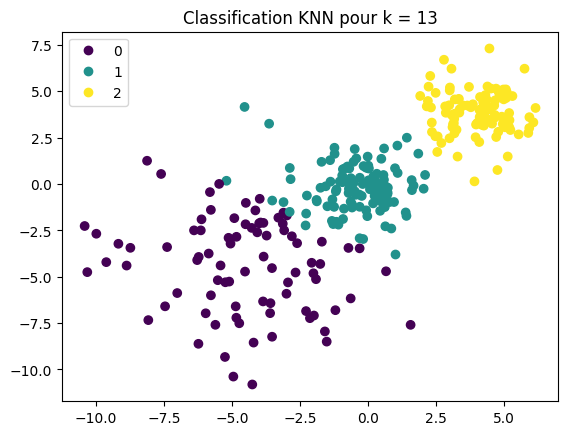

k =  13 taux d'erreur =  5.333333333333334 %


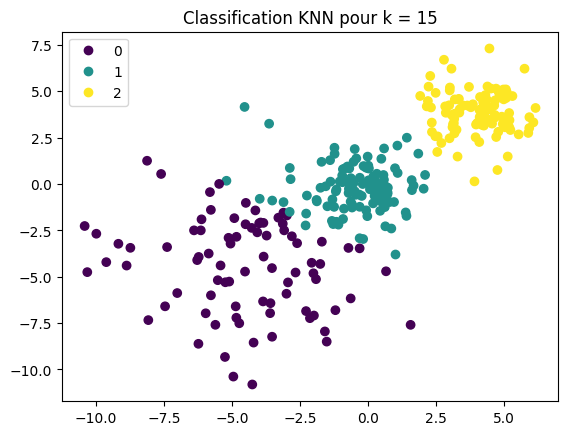

k =  15 taux d'erreur =  5.666666666666666 %


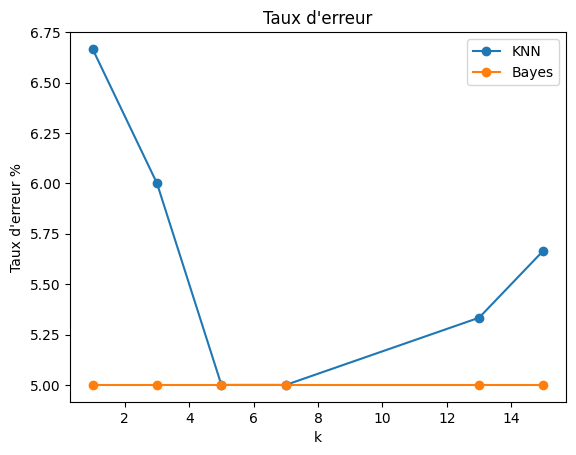

In [10]:
k = [1, 3, 5, 7, 13, 15]

p1_kmean_apprent, p1_kmean_x, p1_kmean_oracle = readExcel("p1_Kmean")
classes = p1_kmean_apprent[2]
p1_kmean_apprent = p1_kmean_apprent.drop(columns=[2])

# for KNN
knnErrors = []
for i in k:
    res_knn = knn(p1_kmean_apprent, classes, i, p1_kmean_x)
    affiche_classe(p1_kmean_x[0], p1_kmean_x[1], res_knn, "Classification KNN pour k = " + str(i))
    error = calcTauxErreur(res_knn, p1_kmean_oracle)
    print("k = ", i, "taux d'erreur = ", error , "%")
    knnErrors.append(error)

# for Bayes
res_bayes = naive_bayes(p1_kmean_apprent, classes, p1_kmean_x)
bayesErrors = [calcTauxErreur(res_bayes, p1_kmean_oracle)]*len(k)

affiche_taux_erreur(k, knnErrors, bayesErrors)

### 2.4 Distribution inconnue

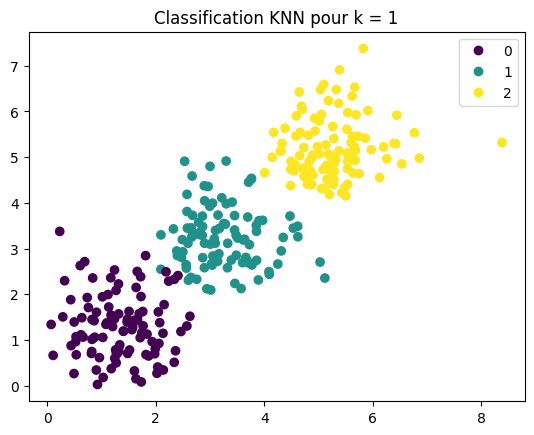

k =  1 taux d'erreur =  1.6666666666666667 %


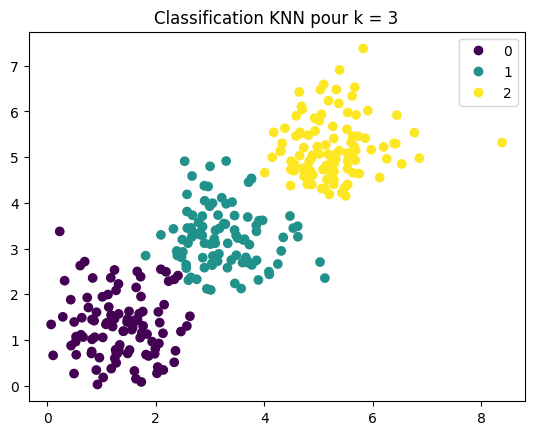

k =  3 taux d'erreur =  1.6666666666666667 %


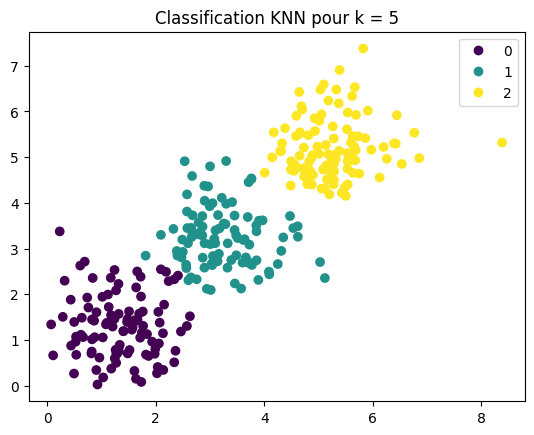

k =  5 taux d'erreur =  1.6666666666666667 %


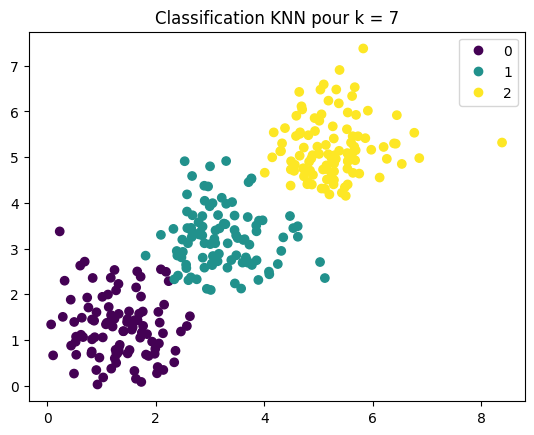

k =  7 taux d'erreur =  1.0 %


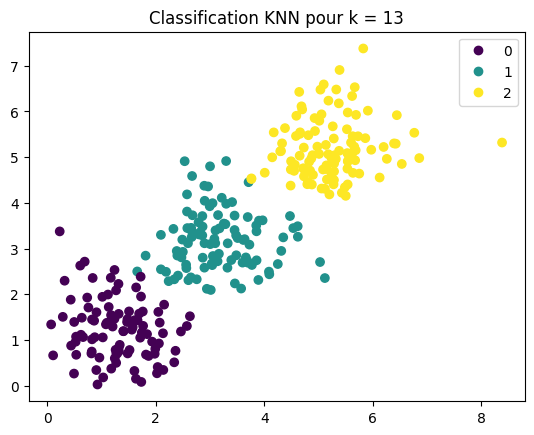

k =  13 taux d'erreur =  3.0 %


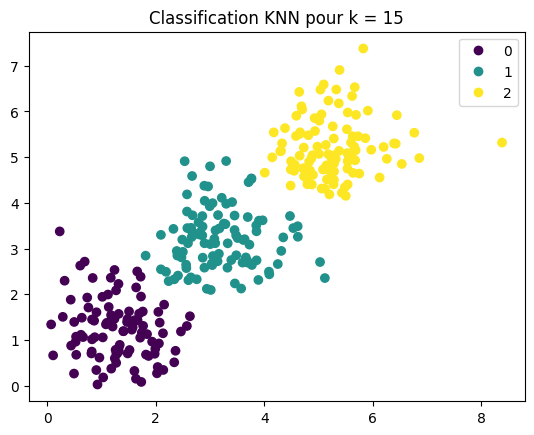

k =  15 taux d'erreur =  2.0 %


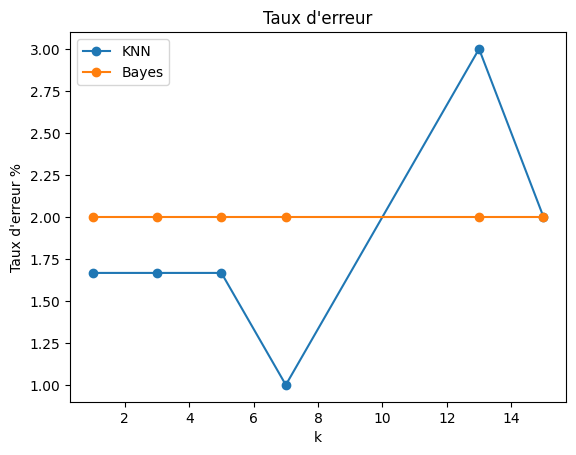

In [11]:
k = [1, 3, 5, 7, 13, 15]

p1_nonGaussien_apprent, p1_nonGaussien_x, p1_kmean_oracle = readExcel("p1_NonGaussien")
classes = p1_nonGaussien_apprent[2]
p1_nonGaussien_apprent = p1_nonGaussien_apprent.drop(columns=[2])

# for KNN
knnErrors = []
for i in k:
    res_knn = knn(p1_nonGaussien_apprent, classes, i, p1_nonGaussien_x)
    affiche_classe(p1_nonGaussien_x[0], p1_nonGaussien_x[1], res_knn, "Classification KNN pour k = " + str(i))
    error = calcTauxErreur(res_knn, p1_kmean_oracle)
    print("k = ", i, "taux d'erreur = ", error , "%")
    knnErrors.append(error)

# for Bayes
res_bayes = naive_bayes(p1_nonGaussien_apprent, classes, p1_nonGaussien_x)
bayesErrors = [calcTauxErreur(res_bayes, p1_kmean_oracle)]*len(k)

affiche_taux_erreur(k, knnErrors, bayesErrors)

# Exercice 3
## Classification d'images
### 3.1 Calcul des descripteurs

In [12]:
classes = ["Jungle", "Plage", "Monuments", "Bus", "Dinosaures", "Eléphants","Fleurs", "Chevaux", "Montagne" , "Plats"]
mesures = []
descriptors = ["WangSignaturesJCD", "WangSignaturesPHOG", "WangSignaturesCEDD", "WangSignaturesFCTH", "WangSignaturesFuzzyColorHistogr"]

for ensemble_mesure in descriptors:
    X = (pd.read_excel('../data/WangSignatures.xls', ensemble_mesure, index_col = 0,header=None))
    mesures.append([ensemble_mesure, X.values])



In [13]:
label=np.zeros(1000,'int')
for b in range(0,1000):
    name= X.index[b] # something like '123.jpg'
    lbl = int(int(name[0:-4])/100) # remove '.jpg' (4 last chars) and divide by 100
    label[b]= lbl

### 3.2 Mise en place d'un système de classification

In [14]:
def discriminate (descriptors, label):

    mesures = pd.DataFrame()
    for descriptor in descriptors:
        X = (pd.read_excel('../data/WangSignatures.xls', descriptor, index_col = 0,header=None))
        mesures = pd.concat([mesures, X], axis=1)


    # split dataset (train and test)
    X_train, X_test, Y_train, Y_test = train_test_split(mesures.iloc[:, 1:], label, test_size=0.2, random_state=1, stratify=label)

    # use KNN
    k = [1, 3, 5, 7, 13, 15]
    knnErrors = []
    for i in k:
        # create KNN classifier
        knn = KNeighborsClassifier(n_neighbors=i)
        # fit the classifier to the data
        knn.fit(X_train, Y_train)
        # predict
        knn_res = knn.predict(X_test)

        # calculate accuracy of class predictions
        #print("k = ", i, "taux d'erreur = ", calcTauxErreur(knn_res, Y_test) , "%")
        knnErrors.append(calcTauxErreur(knn_res, Y_test))

    # use Bayes
    #Create a Gaussian Classifier
    bayes = MultinomialNB()
    # Train the model using the training sets
    bayes.fit(X_train,Y_train)
    # Predict 
    bayes_res = bayes.predict(X_test)
    #print("bayes taux d'erreur = ", calcTauxErreur(bayes_res, Y_test) , "%")
    bayesErrors = [calcTauxErreur(bayes_res, Y_test)]*len(k)

    title = "" 
    for d in descriptors :
        title +=  d + " "

    affiche_taux_erreur(k, knnErrors, bayesErrors, title = "taux d'erreur pour " + title)

    # confusion matrix
    knn_cm = confusion_matrix(Y_test, knn_res)
    # display confusion matrix for KNN in blue
    cm_display = ConfusionMatrixDisplay(knn_cm).plot(cmap=plt.cm.Reds)
        
    plt.title("Matrice de confusion pour KNN avec " + title)

    bayes_cm = confusion_matrix(Y_test, bayes_res)
    # display confusion matrix for Bayes
    cm_display = ConfusionMatrixDisplay(bayes_cm).plot(cmap=plt.cm.Blues)
    plt.title("Matrice de confusion pour Bayes avec " + title)

    plt.show()

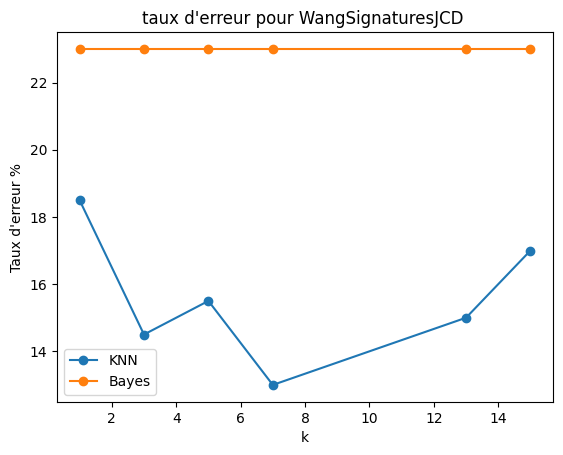

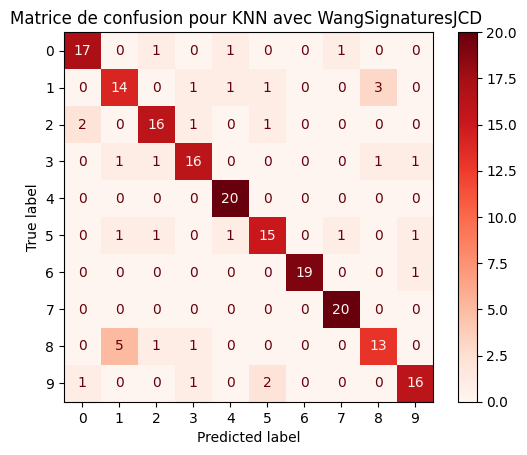

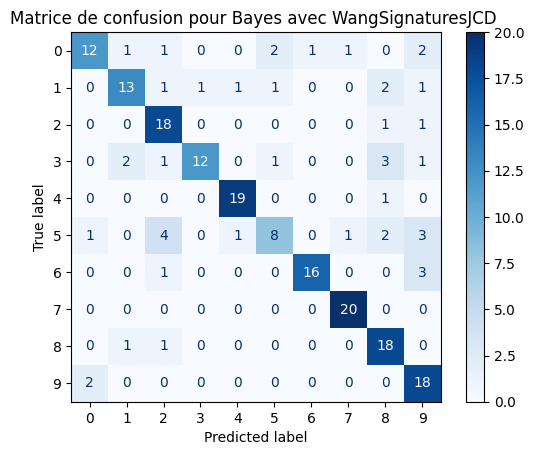

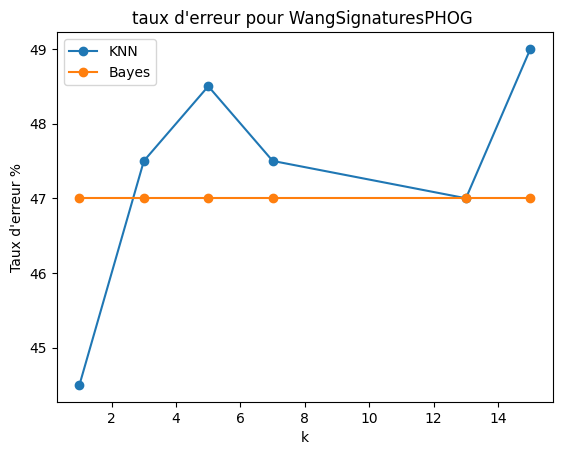

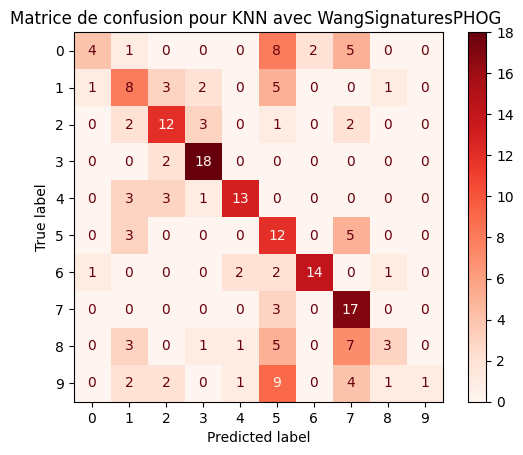

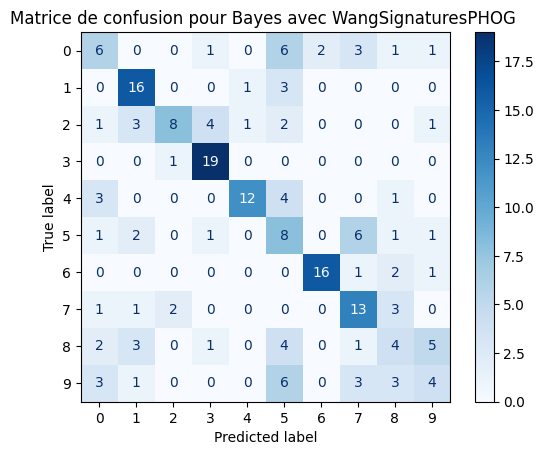

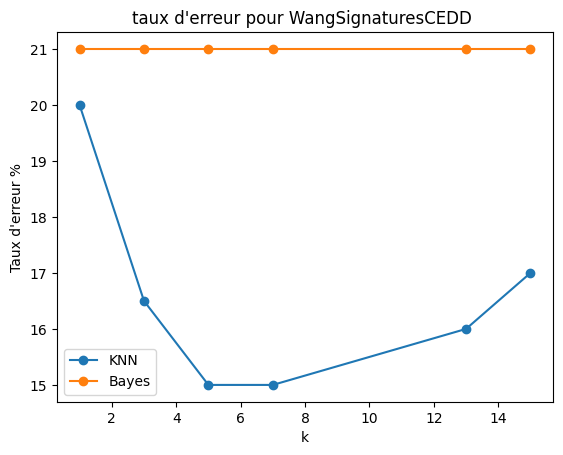

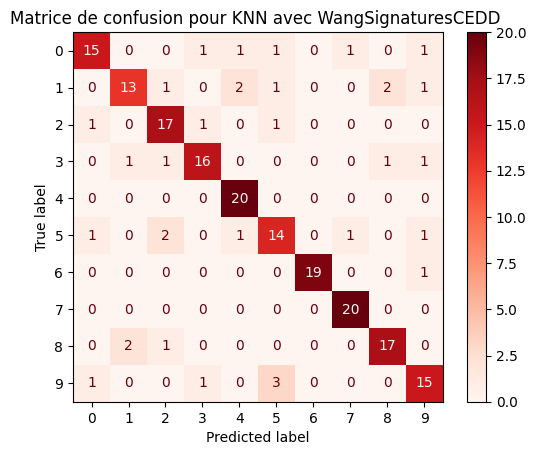

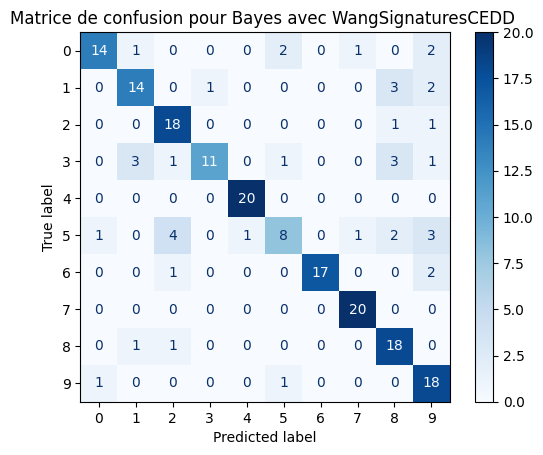

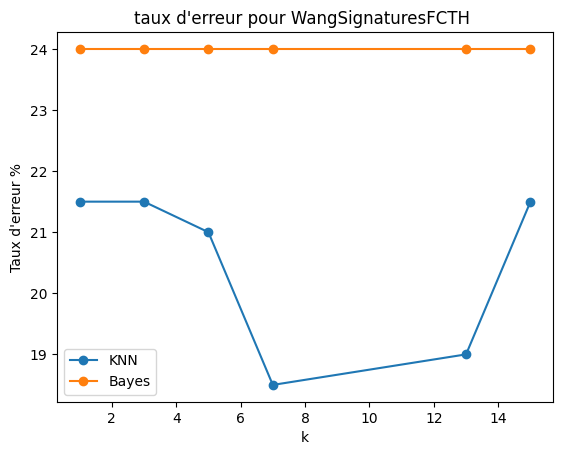

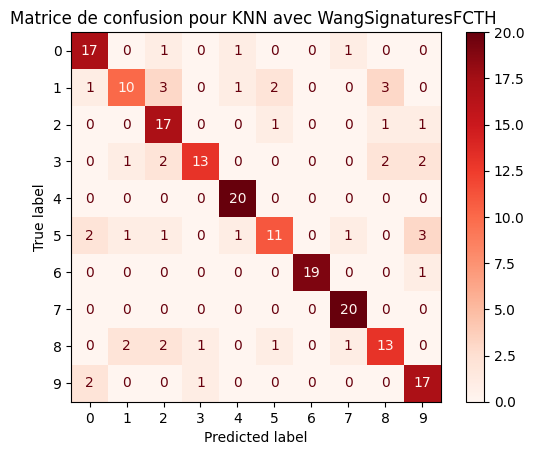

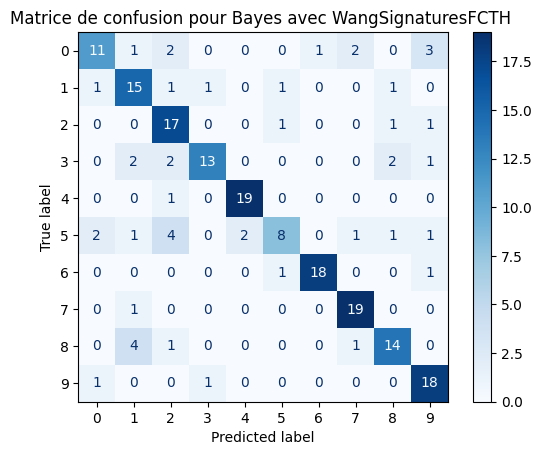

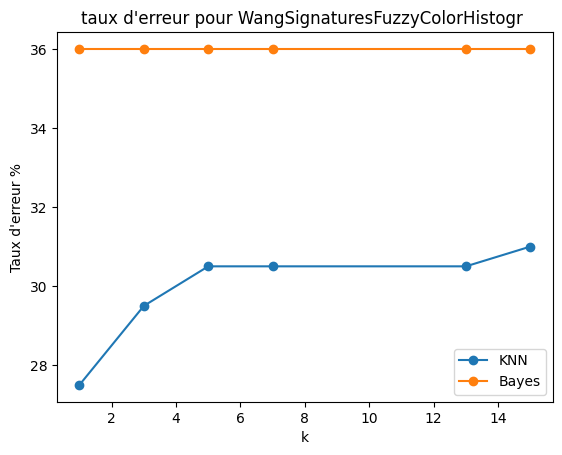

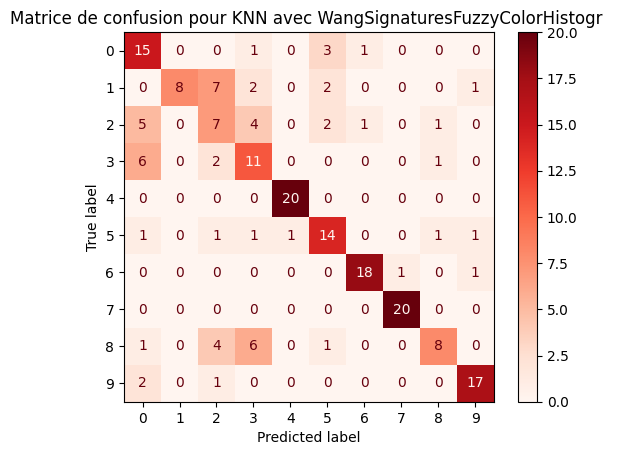

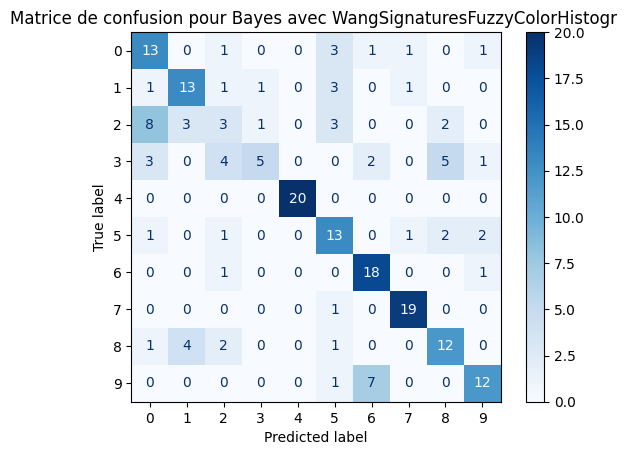

In [15]:
# discriminate with all descriptors one by one
for descriptor in descriptors:
    discriminate([descriptor], label)

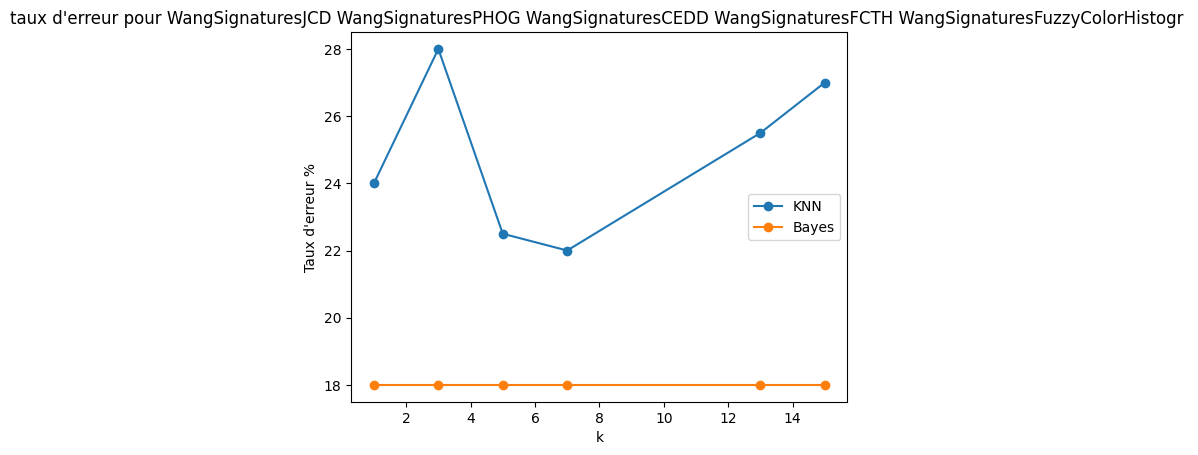

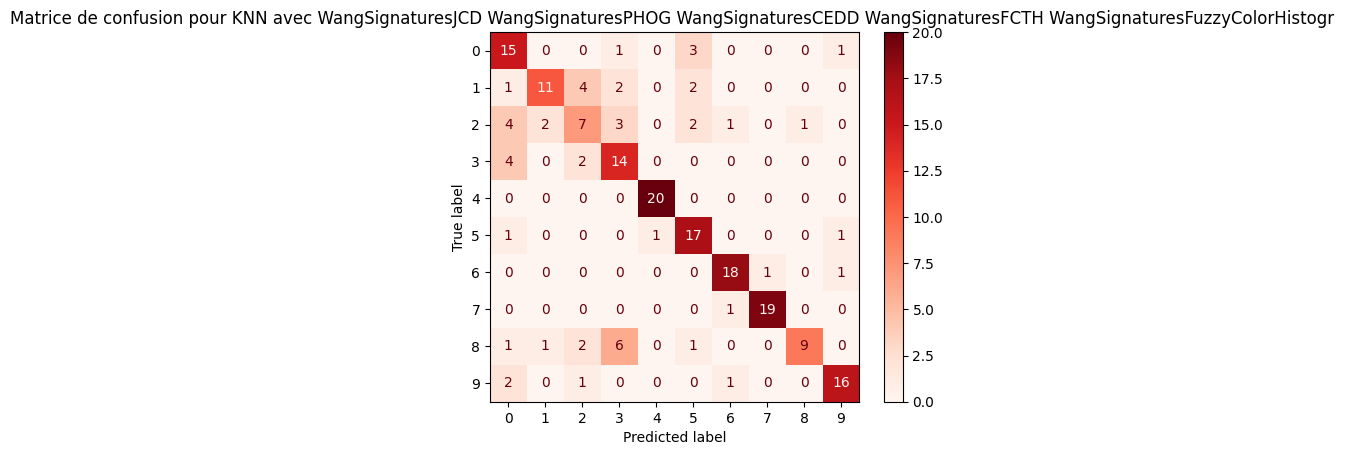

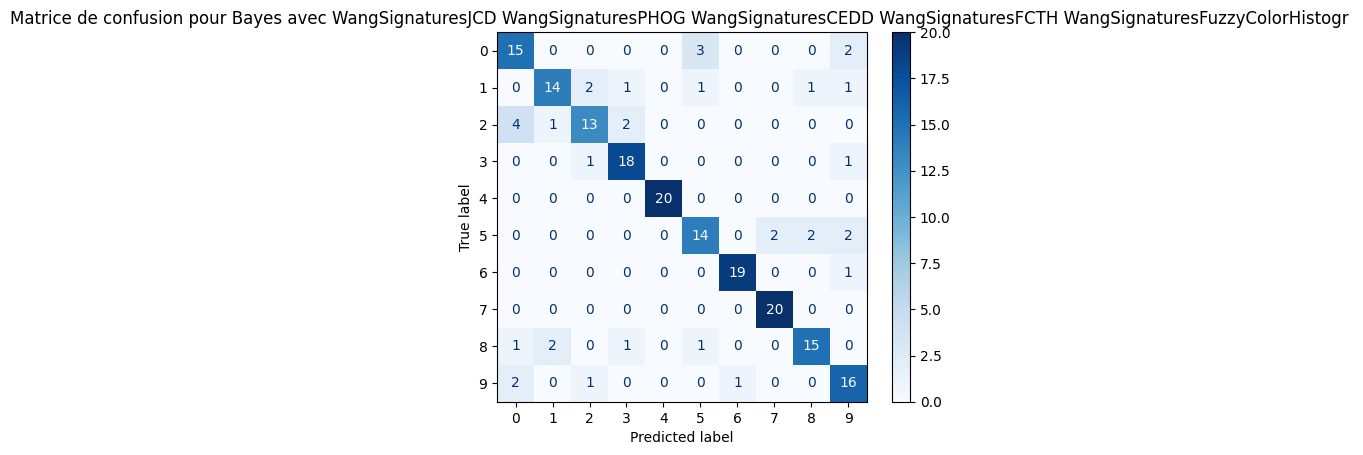

In [16]:
# discriminate with all descriptors together
discriminate(descriptors, label)

In [17]:
# find in the excel's first column the value "imageNumber.jpg"
# and return the row number
excel = pd.read_excel('../data/WangSignatures.xls', 'WangSignaturesJCD', index_col = 0,header=None)
def findRowNumber(imageNumber):
    for i in range(len(excel.index)):
        if excel.index[i] == str(imageNumber) + ".jpg":
            return i
    return -1

Choix de l'utilisateur ex : '0 JCD KNN 3' ou '12 CEDD Bayes', '999 FuzzyColorHistogr KNN 5'
taux d'erreur =  15.0 %
rowNumber =  24
L'image 12 est prédite comme appartenant à la classe Jungle


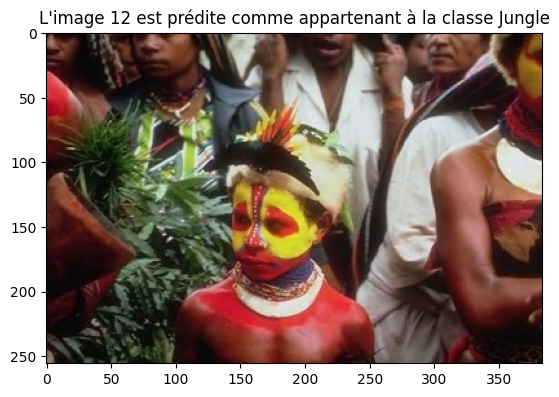

In [18]:
############################ let the user choose ############################
def userChoiceDiscrimination() :
    # user input an image number
    imageNumber = int(input("Entrer un numéro d'image entre 0 et 999 : "))
    if imageNumber < 0 or imageNumber > 999:
        print("Le numéro d'image doit être compris entre 0 et 999")
        return

    # user input choice descriptor ["JCD", "PHOG", "CEDD", "FCTH", "FuzzyColorHistogr"]
    descriptor = input("Entrer un descripteur parmi JCD, PHOG, CEDD, FCTH, FuzzyColorHistogr : ")
    if descriptor not in ["JCD", "PHOG", "CEDD", "FCTH", "FuzzyColorHistogr"]:
        print("Le descripteur doit être parmi JCD, PHOG, CEDD, FCTH, FuzzyColorHistogr")
        return

    descriptor = "WangSignatures" + descriptor
    mesure = pd.DataFrame()
    X = (pd.read_excel('../data/WangSignatures.xls', descriptor, index_col = 0,header=None))
    mesure = pd.concat([mesure, X], axis=1)

    # user input choice model (KNN or Bayes)
    model = input("Entrer un modèle parmi KNN ou Bayes : ")
    if model not in ["KNN", "Bayes"]:
        print("Le modèle doit être parmi KNN ou Bayes")
        return
        # if KNN : user input k
    if model == "KNN":
        k = int(input("Entrer un entier k : "))
        if k < 1:
            print("k doit être un entier positif")
            return
        model = KNeighborsClassifier(n_neighbors=k)
    else:
        model = MultinomialNB()

    # split dataset (train and test)
    # With test_size 20% so 200 images / 1000
    X_train, X_test, Y_train, Y_test = train_test_split(mesure.iloc[:, 1:], label, test_size=0.2, random_state=1, stratify=label)

    # fit the classifier to the data
    model.fit(X_train, Y_train)

    # predict
    res = model.predict(X_test)

    # calculate accuracy of class predictions
    print("taux d'erreur = ", calcTauxErreur(res, Y_test) , "%")

    # find the imageNumber's row in the excel
    rowNumber = findRowNumber(imageNumber)
    print ("rowNumber = ", rowNumber)

    # predict the image class
    imageClass = model.predict(mesure.iloc[rowNumber, 1:].values.reshape(1, -1))
    predictionTitle = "L'image " + str(imageNumber) + " est prédite comme appartenant à la classe " + str(classes[imageClass[0]])
    print(predictionTitle)

    # display the image
    image = mpimg.imread("../data/Wang/" + str(imageNumber) + ".jpg")
    plt.title(predictionTitle)
    plt.imshow(image)


print("Choix de l'utilisateur ex : '0 JCD KNN 3' ou '12 CEDD Bayes', '999 FuzzyColorHistogr KNN 5'")
userChoiceDiscrimination()